In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Modelling
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [30]:
df = pd.read_csv('data/StudentsPerformance.csv')

Preparing X and Y Variables

In [31]:
x = df.drop(columns=['math score'], axis=1)

In [32]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [33]:
y = df['math score']

In [34]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [35]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [36]:
x = preprocessor.fit_transform(x)

In [37]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [38]:
x.shape

(1000, 19)

In [39]:
# Seperate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [40]:
def evaluate_mode(true, predicted):
    mae= mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [41]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)


    # Make Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)


    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_mode(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_mode(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("-- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-- R2 Score: {:.4f}".format(model_train_r2))

    print("------------------------------------------------")

    print('Model performance for Test set')
    print("-- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)


    print('='*35)
    print('\n')



LinearRegression
Model performance for Training set
-- Root Mean Squared Error: 5.3243
-- Mean Absolute Error: 4.2671
-- R2 Score: 0.8743
------------------------------------------------
Model performance for Test set
-- Root Mean Squared Error: 5.3960
-- Mean Absolute Error: 4.2158
-- R2 Score: 0.8803


Lasso
Model performance for Training set
-- Root Mean Squared Error: 6.5938
-- Mean Absolute Error: 5.2063
-- R2 Score: 0.8071
------------------------------------------------
Model performance for Test set
-- Root Mean Squared Error: 6.5197
-- Mean Absolute Error: 5.1579
-- R2 Score: 0.8253


Ridge
Model performance for Training set
-- Root Mean Squared Error: 5.3233
-- Mean Absolute Error: 4.2650
-- R2 Score: 0.8743
------------------------------------------------
Model performance for Test set
-- Root Mean Squared Error: 5.3904
-- Mean Absolute Error: 4.2111
-- R2 Score: 0.8806


KNeighborsRegressor
Model performance for Training set
-- Root Mean Squared Error: 5.7077
-- Mean Absolu

Results

In [42]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880345
5,RandomForestRegressor,0.852022
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.845956
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,Decision Tree,0.768717


### Linear Regression

In [43]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.88


Plot y_pred and y_test

Text(0, 0.5, 'Predicter')

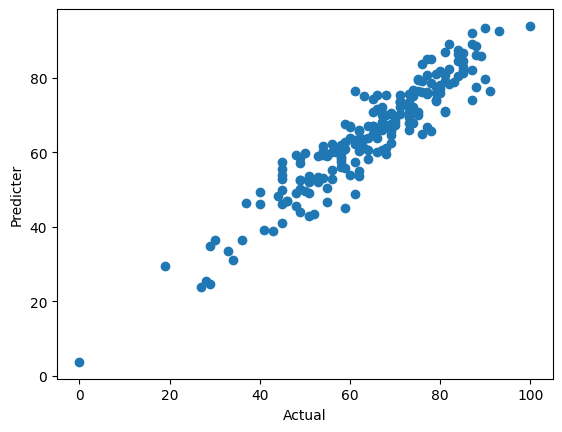

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicter")

<Axes: xlabel='math score'>

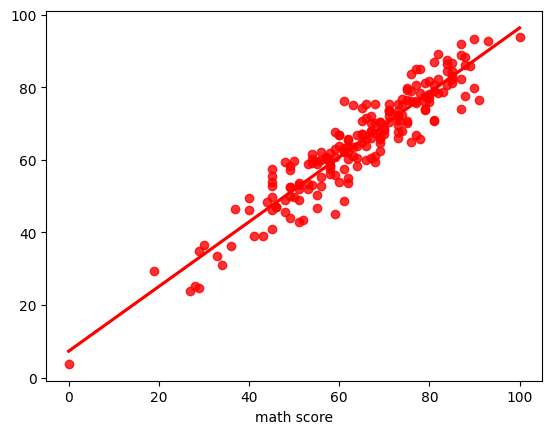

In [45]:
sns.regplot(x=y_test,y=y_pred,ci=None, color='red')

Difference Between Actual and Predicted Values

In [46]:
pred_df = pd.DataFrame({"Actual Value":y_test, "Predicted value":y_pred, "Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
